In [1]:
# importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Installing imblearn which could be used for balancing the imbalanced classes
!pip install imblearn

In [3]:
# Reading the dataset

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [4]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


This is the dataset, 

we have 1000 rows(0-999).

We have 40 columns(0-39).

We can also infer from here that the target column is "fraud_reported" and its contains categorical data (has 2 classes Y/N), hence is a 
Classification Problem

We need to use Classification models to perform our predictions.

We can see the presence of lot of missing values present in the form of '?' and 'Nan'. It needs to be treated

# Exploratory Data Analysis (EDA)

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


df.head() displays the first 5 row values(indexed from 0-4) from the dataset

In [6]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


df.tail() displays the last 5 row values(indexed from 995-999) from the dataset

In [7]:
df.shape

(1000, 40)

No. of rows - 1000

No. of columns - 40

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

df.columns gives the names of all 35 column headings

In [9]:
# we can see some missing values denoted by '?'

df.replace('?', np.nan, inplace = True)

In [10]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

This df.dtypes displays the datatypes of all the 40 columns in the dataset

The info that can be infered here is as below

The columns "policy_bind_date", "policy_state", "policy_csl", "insured_sex", "insured_education_level", "insured_occupation",
"insured_hobbies", "insured_relationship", "incident_date", "incident_type", "collision_type", "incident_severity" , 
"authorities_contacted", "incident_state", "incident_city ", "incident_location", "property_damage", "police_report_available",
"auto_make ", "auto_model" are in non-identifiable datatype hence displayed as object.

The target column "fraud_reported" also is of object datatype.

We need to do manipulations on all of these mentiones columns and make it identifiable for our models to predict the data


Let's check for the unique values that are present in our dataset

In [11]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

The above are the number of unique values present in our dataset for each columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [13]:
# The info that we can infer from df.info() is as below

# Total entries are 1000(0-999)

# Total data columns is 40

# Most data column contains no null values, hence the non-null count is 1000 for those

# Column "_c39" contains 0 non null values so all are null or missing values only

# Null values are present in column "collision_type", "property_damage", "police_report_available".

# The columns "policy_bind_date", "policy_state", "policy_csl", "insured_sex", "insured_education_level", "insured_occupation",
# "insured_hobbies", "insured_relationship", "incident_date", "incident_type", "collision_type", "incident_severity" , 
# "authorities_contacted", "incident_state", "incident_city ", "incident_location", "property_damage", "police_report_available",
# "auto_make ", "auto_model" are in non-identifiable datatype hence displayed as object.

# The target column "fraud_reported" also is of object datatype.

# All other columns are of either float or int datatype

# This also gives info on the memory usage



In [14]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Since in _c39 all the values are missing let's drop that column. As for collision_type,property_damage,police_report_available we shall replace the missing values with mode of the variable.

In [15]:
df.shape

(1000, 40)

# Data Manipulation

In [16]:
# we will replace the '?' by the most common collision type as we are unaware of the type.
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

# It may be the case that there are no responses for property damage then we might take it as No property damage.
df['property_damage'].fillna('NO', inplace = True)

# again, if there are no responses for police report available then we might take it as No report available
df['police_report_available'].fillna('NO', inplace = True)

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We have treated the columns "collision_type", "property damage" and "police_report_available" and now it doesnot contain missing values

In [17]:
df=df.drop(['_c39'],axis=1)

In [18]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


We have successfully dropped c_39 and now the column count is updated to 39

In [19]:
# Trying to find the duplicate rows in our dataset

duplicate=df.duplicated()
print(duplicate.sum())      # gives no. of duplicate rows in the dataset
df[duplicate]               # prints the duplicate rows in the dataset

0


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


There are no duplicate rows present in the dataset

In [20]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [21]:
# From df.describe() we can see the details about various statistical data like Count,Mean,Standard Deviation,Max Value,Min Value for our dataset
# So from min and max values, we basically get the range
# We have the count of 1000 in our dataset
# We have few columns with zero as there minimum value

# Uni-Variant Analysis

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

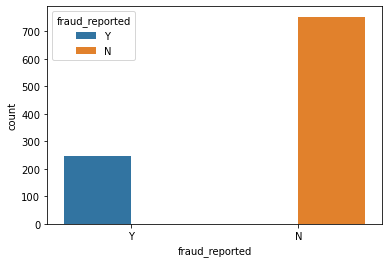

In [22]:
sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

The classes in our target column are not balanced, we have 753 No for fraud_detected and 247 yes for fraud detection

Classes are imbalanced and we need to balance our classes

In [23]:
df['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

N    753
Y    247
Name: fraud_reported, dtype: int64

In [24]:
# Check on categorical variables:

df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

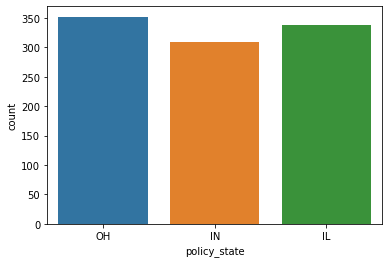

In [25]:
sns.countplot(df['policy_state'])
df['policy_state'].value_counts()

We have 352 values of OH, 338 values of IL and 310 values of IN for policy_state

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

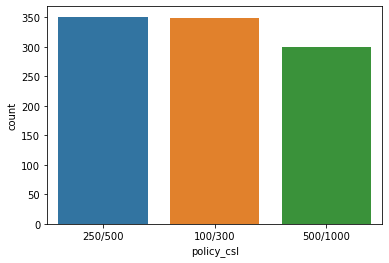

In [26]:
sns.countplot(df['policy_csl'])
df['policy_csl'].value_counts()

We have 351 values of 250/500, 349 count of 100/300 and 300 count of 500/1000 for policy_csl

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

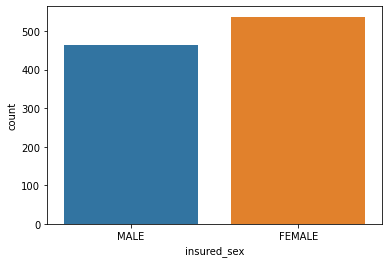

In [27]:
sns.countplot(df['insured_sex'])
df['insured_sex'].value_counts()

We have 537 count of female and 463 count of males who have claimed for insurance

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

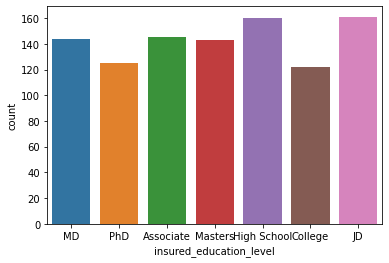

In [28]:
sns.countplot(df['insured_education_level'])
df['insured_education_level'].value_counts()

We have 161 count of JD, 160 count of High School, 145 Associates, 144 holding MD, 143 Masters, 125 PhD and 122 college going among insurers

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

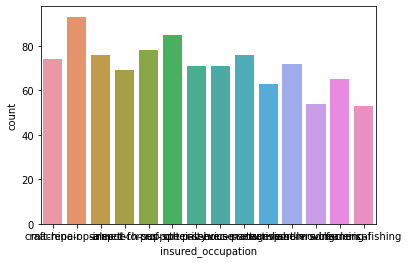

In [29]:
sns.countplot(df['insured_occupation'])
df['insured_occupation'].value_counts()

The above are the occupations of the insurers

reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
movies            55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

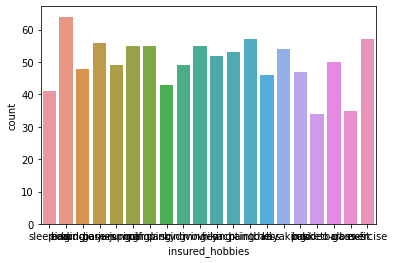

In [30]:
sns.countplot(df['insured_hobbies'])
df['insured_hobbies'].value_counts()

The above graph shows the hobbies among the insurers

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

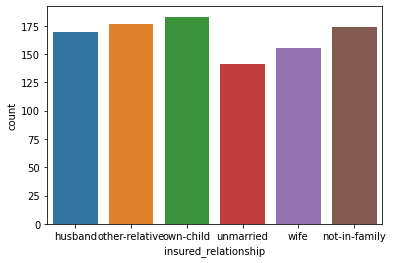

In [31]:
sns.countplot(df['insured_relationship'])
df['insured_relationship'].value_counts()

Among the insurers 183 own-child, 177 count of other-relative, 174 not-in-family, 141 unmarried, 170 are husbands and 155 are wifes

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

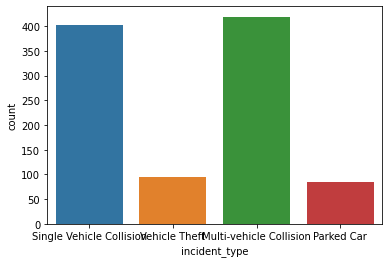

In [32]:
sns.countplot(df['incident_type'])
df['incident_type'].value_counts()

The cases of incidents are as belows

419 no. of multi-vehicle collision, 403 count of single vehicle collision, 94 vehicle thefts and 84 parked car incidents

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

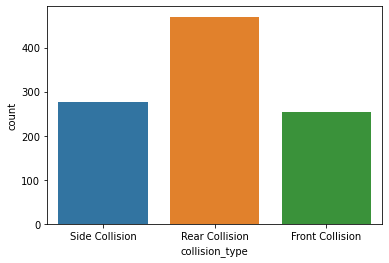

In [33]:
sns.countplot(df['collision_type'])
df['collision_type'].value_counts()

We observe 470 rear collisions, 276 side collisions and 254 front collisions

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

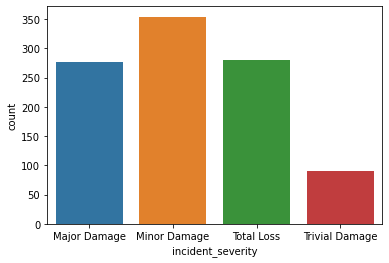

In [34]:
sns.countplot(df['incident_severity'])
df['incident_severity'].value_counts()

Among the severity levels, 354 have minor damage , 280 have total loss, major damage is of 276 in no. and 90 trivial damage

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

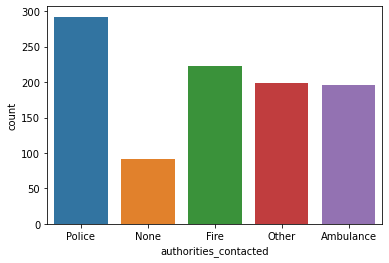

In [35]:
sns.countplot(df['authorities_contacted'])
df['authorities_contacted'].value_counts()

After the incidents , 292 people contacted police, 223 contacted fire, 196 people contacted ambulance and 91 contacted none

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

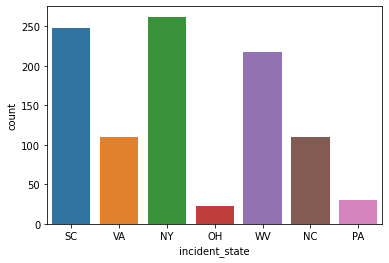

In [36]:
sns.countplot(df['incident_state'])
df['incident_state'].value_counts()

The above gives the state in which the incident occured

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

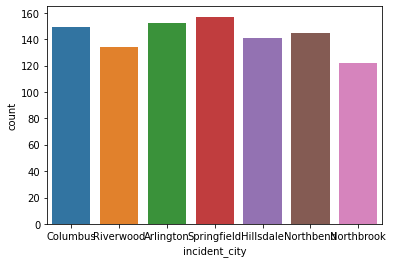

In [37]:
sns.countplot(df['incident_city'])
df['incident_city'].value_counts()

The above gives info on the incident occured city

2725 Britain Ridge       1
2123 Texas Ave           1
2037 5th Drive           1
4188 Britain Ave         1
8542 Lincoln Ridge       1
                        ..
4876 Washington Drive    1
7575 Pine St             1
8940 Elm Ave             1
6137 MLK St              1
3053 Lincoln Drive       1
Name: incident_location, Length: 1000, dtype: int64

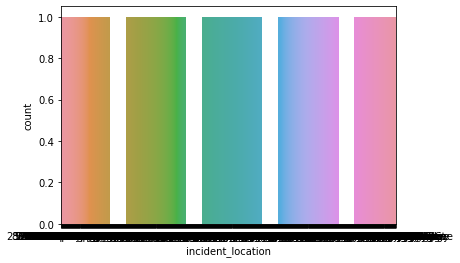

In [38]:
sns.countplot(df['incident_location'])
df['incident_location'].value_counts()

The above gives the info on incident location

NO     698
YES    302
Name: property_damage, dtype: int64

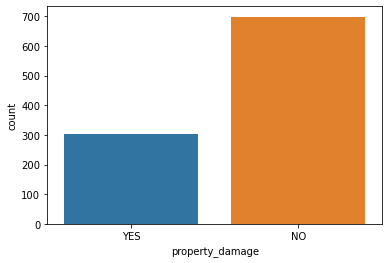

In [39]:
sns.countplot(df['property_damage'])
df['property_damage'].value_counts()

302 got their property damaged during the incident and 698 no for property damage

NO     686
YES    314
Name: police_report_available, dtype: int64

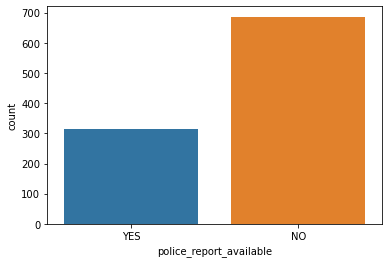

In [40]:
sns.countplot(df['police_report_available'])
df['police_report_available'].value_counts()

Police report is availabel on 314 incidents and for 686 cases there are no police reports

# Bi -Variant Analysis

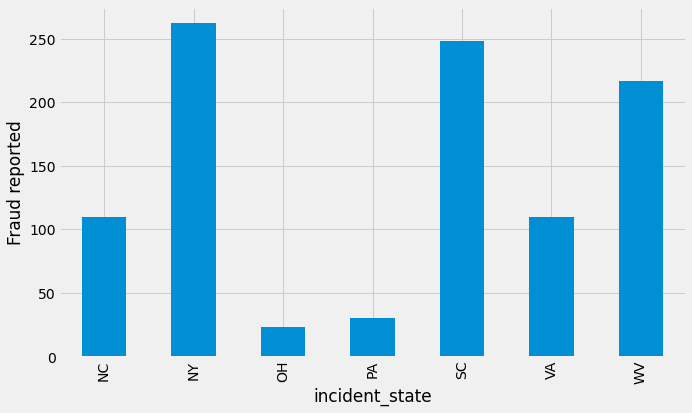

In [41]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

The states SC and NY has higher no. of insurance frauds detected 

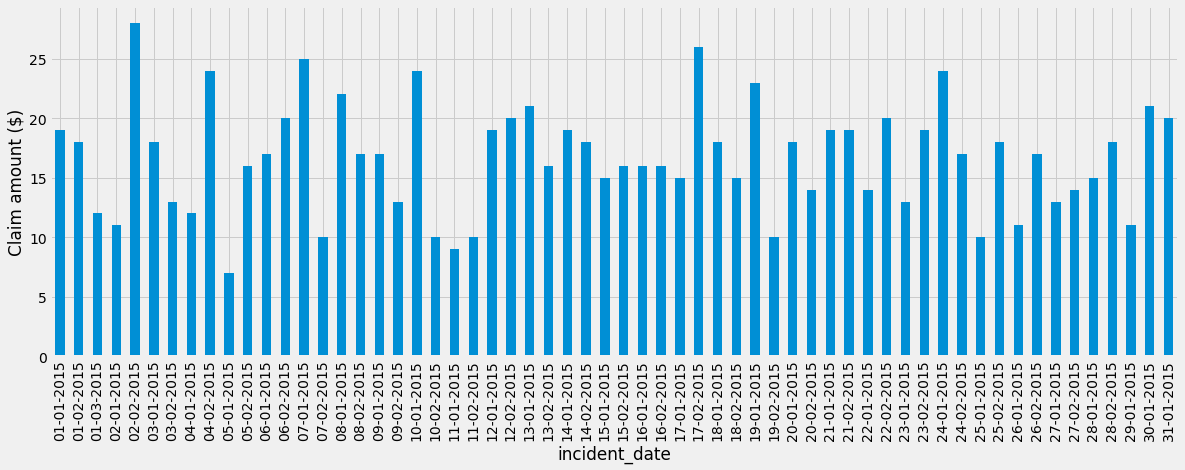

In [42]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

We see that, all the cases in above plot are for the months of January and February 2015

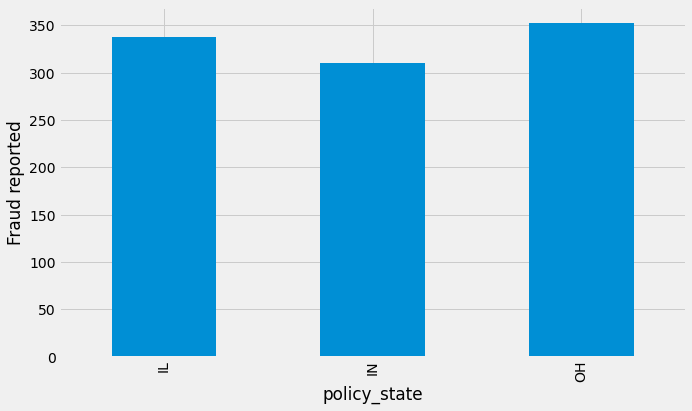

In [43]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

We can see the policy_state of fraud reported and their counts 

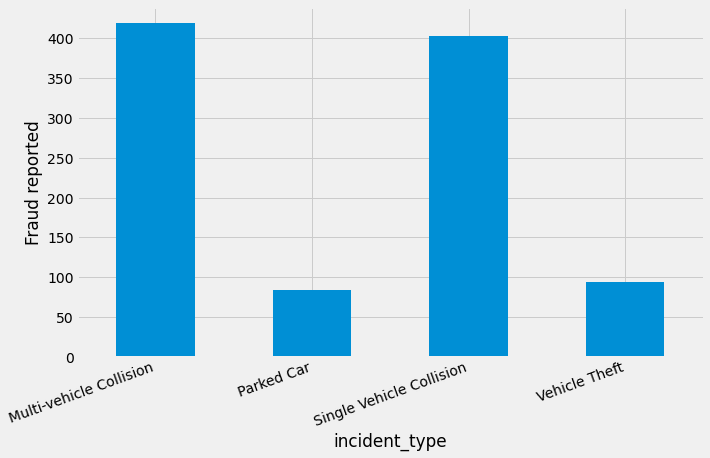

In [44]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()


Single vehicle and multi vehicle collision incident types have higher no. of frauds reported

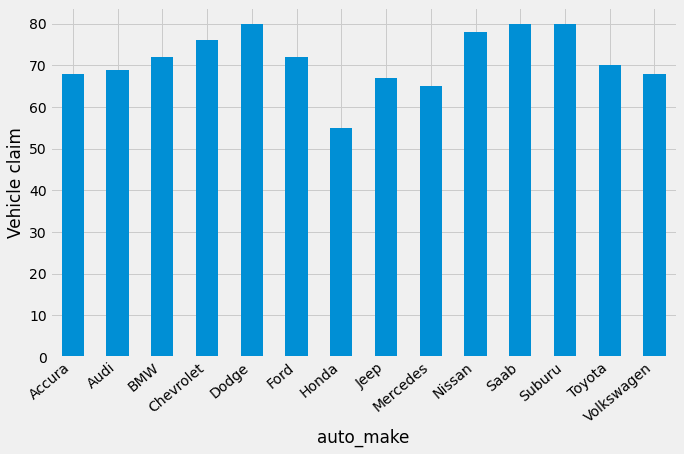

In [45]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

The above shows the vehicle claims or each type of auto_make and their counts

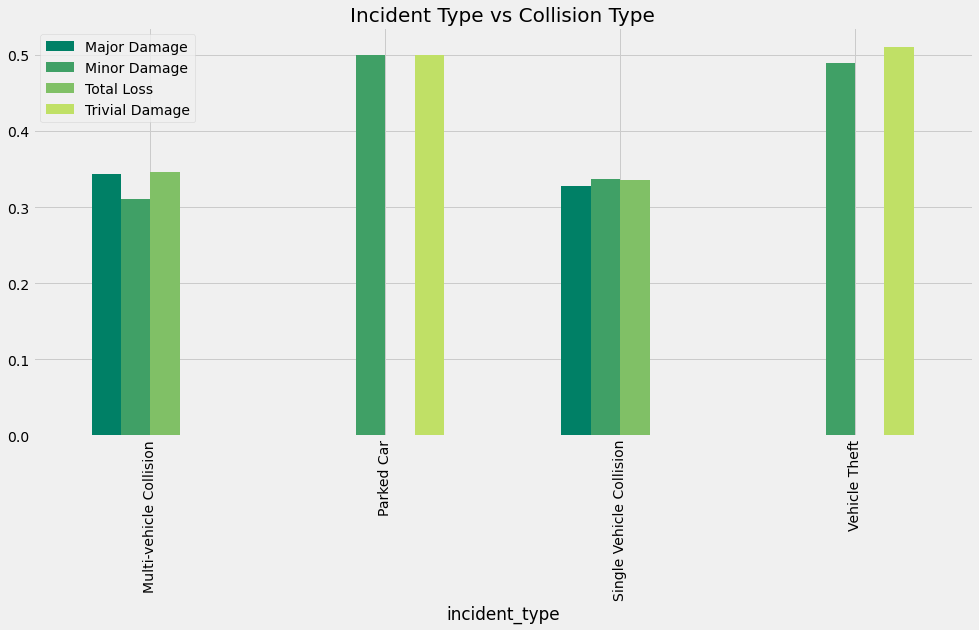

In [46]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

We observe the trivial damage and minor damage for the parked cars

In multi-vehicle collision we see major damage in greater amount and hence equal amount of total loss
We also see minor damage for multi-vehicle collision

Single-vehicle collisions undergo major, minor damage and since major damage is there we also have total loss in this case

There is minor and trivial damage seen in case of vehicle theft

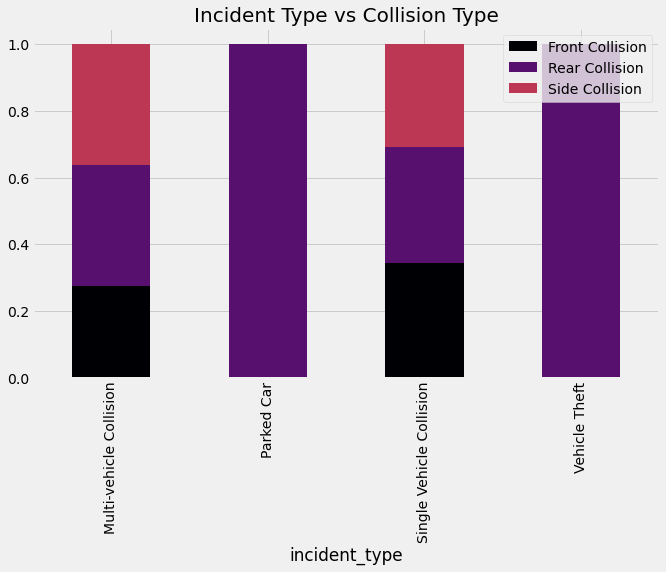

In [47]:
incident = pd.crosstab(df['incident_type'], df['collision_type'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (10, 6),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

We see rear collision happening incase of parked car type

Even in vehicle theft we see only rear collision

All three front, rear and side collisions are seen for multi and single vehicle collisions

We have explored the dataset and before further analysis let's drop the columns that are not useful for our predictions in detection of fraud

In [48]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
          'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df.drop(to_drop, inplace = True, axis = 1)

In [49]:
df

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,...,1,YES,0,1,NO,87200,17440,8720,61040,N
996,285,41,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,...,1,YES,2,3,NO,108480,18080,18080,72320,N
997,130,34,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,...,3,NO,2,3,YES,67500,7500,7500,52500,N
998,458,62,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,...,1,NO,0,1,YES,46980,5220,5220,36540,N


We have successfully dropped columns that are not necessary for predicting the reported fraud

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [51]:
# Check on categorical variables:

df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [52]:
# Assigning categorical columns alone into a new dataframe

df1 = df[['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported']]

In [53]:
df1

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,500/1000,FEMALE,Masters,craft-repair,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,YES,NO,N
996,100/300,FEMALE,PhD,prof-specialty,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,YES,NO,N
997,250/500,FEMALE,Masters,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NO,YES,N
998,500/1000,MALE,Associate,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NO,YES,N


In [54]:
df1.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [55]:
# Check on continuous variables:

df._get_numeric_data().columns  # checking continuous columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [56]:
# Firstly importing Label Encoder
# Label Encoder is used here to convert all the columns with categorical values into numerical values

from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in df1.columns:
    df1[column] = labelencoder.fit_transform(df1[column])

In [57]:
df1

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,1,1,4,2,0,2,2,0,4,1,1,1
1,1,1,4,6,2,3,1,1,4,0,0,1
2,0,0,6,11,3,0,1,1,4,0,0,0
3,1,0,6,1,4,2,0,0,4,0,0,1
4,2,1,0,11,4,3,1,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,5,2,4,2,0,1,1,1,0,0
996,0,0,6,9,5,2,1,0,1,1,0,0
997,1,0,5,1,2,0,2,1,4,0,1,0
998,2,1,0,5,5,2,1,0,3,0,1,0


 All the categorical string data columns are encoded and converted to numeric.

In [58]:
# Now trying to combine and overwrite the string values in df to numeric values from df1

df_new = df1.combine_first(df)
display(df_new)

,age,authorities_contacted,bodily_injuries,capital-gains,capital-loss,collision_type,fraud_reported,incident_hour_of_the_day,incident_severity,incident_type,...,police_report_available,policy_annual_premium,policy_csl,policy_deductable,property_claim,property_damage,total_claim_amount,umbrella_limit,vehicle_claim,witnesses
0,48.0,4,1.0,53300.0,0.0,2,1,5.0,0,2,...,1,1406.91,1,1000.0,13020.0,1,71610.0,0.0,52080.0,2.0
1,42.0,4,0.0,0.0,0.0,1,1,8.0,1,3,...,0,1197.22,1,2000.0,780.0,0,5070.0,5000000.0,3510.0,0.0
2,29.0,4,2.0,35100.0,0.0,1,0,7.0,1,0,...,0,1413.14,0,2000.0,3850.0,0,34650.0,5000000.0,23100.0,3.0
3,41.0,4,1.0,48900.0,-62400.0,0,1,5.0,0,2,...,0,1415.74,1,2000.0,6340.0,0,63400.0,6000000.0,50720.0,2.0
4,44.0,2,0.0,66000.0,-46000.0,1,0,20.0,1,3,...,0,1583.91,2,1000.0,650.0,0,6500.0,6000000.0,4550.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38.0,1,0.0,0.0,0.0,0,0,20.0,1,2,...,0,1310.80,2,1000.0,8720.0,1,87200.0,0.0,61040.0,1.0
996,41.0,1,2.0,70900.0,0.0,1,0,23.0,0,2,...,0,1436.79,0,1000.0,18080.0,1,108480.0,0.0,72320.0,3.0
997,34.0,4,2.0,35100.0,0.0,2,0,4.0,1,0,...,1,1383.49,1,500.0,7500.0,0,67500.0,3000000.0,52500.0,3.0
998,62.0,3,0.0,0.0,0.0,1,0,2.0,0,2,...,1,1356.92,2,2000.0,5220.0,0,46980.0,5000000.0,36540.0,1.0


In [59]:
# Now let's check for datatypes and missing values if any

In [60]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1000 non-null   float64
 1   authorities_contacted        1000 non-null   int32  
 2   bodily_injuries              1000 non-null   float64
 3   capital-gains                1000 non-null   float64
 4   capital-loss                 1000 non-null   float64
 5   collision_type               1000 non-null   int32  
 6   fraud_reported               1000 non-null   int32  
 7   incident_hour_of_the_day     1000 non-null   float64
 8   incident_severity            1000 non-null   int32  
 9   incident_type                1000 non-null   int32  
 10  injury_claim                 1000 non-null   float64
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   int32  
 13  insured_relationshi

We can see that there are no null values present and all the columns are identifiable and have datatype in either float or int.

In [61]:
cor = df_new.corr()
cor

,age,authorities_contacted,bodily_injuries,capital-gains,capital-loss,collision_type,fraud_reported,incident_hour_of_the_day,incident_severity,incident_type,...,police_report_available,policy_annual_premium,policy_csl,policy_deductable,property_claim,property_damage,total_claim_amount,umbrella_limit,vehicle_claim,witnesses
age,1.000000,0.015417,-0.015679,-0.007075,0.007368,-0.075642,0.012143,0.087161,-0.058439,-0.025626,...,-0.020441,0.014404,-0.015185,0.029188,0.060898,-0.003408,0.069863,0.018126,0.062588,0.052359
authorities_contacted,0.015417,1.000000,0.041692,-0.044892,0.025192,0.062212,-0.045802,-0.060955,0.164966,0.100450,...,0.044407,-0.055191,0.056182,-0.000760,-0.118808,-0.004884,-0.169333,0.029044,-0.169710,-0.003721
bodily_injuries,-0.015679,0.041692,1.000000,0.055829,-0.024418,-0.018146,0.033877,-0.034563,-0.018870,-0.009733,...,0.011860,0.026780,-0.000595,-0.022765,0.039749,0.003762,0.047093,0.022743,0.043449,-0.005606
capital-gains,-0.007075,-0.044892,0.055829,1.000000,-0.046904,-0.006170,-0.019173,-0.016406,-0.013396,-0.045857,...,-0.012939,-0.013738,0.005249,0.035212,-0.000779,-0.000616,0.015980,-0.047268,0.015836,-0.017651
capital-loss,0.007368,0.025192,-0.024418,-0.046904,1.000000,0.041494,-0.014863,-0.025054,-0.018647,0.026101,...,-0.039256,0.023547,-0.034612,-0.023544,-0.022863,0.016981,-0.036060,-0.024056,-0.032665,-0.041330
collision_type,-0.075642,0.062212,-0.018146,-0.006170,0.041494,1.000000,-0.017315,0.044074,-0.014702,-0.070920,...,0.047648,0.036556,0.020641,-0.053912,-0.003844,0.004059,-0.011852,0.010041,-0.009127,-0.046659
fraud_reported,0.012143,-0.045802,0.033877,-0.019173,-0.014863,-0.017315,1.000000,0.004316,-0.405988,-0.050376,...,-0.027768,-0.014480,-0.037190,0.014817,0.137835,0.017202,0.163651,0.058622,0.170049,0.049497
incident_hour_of_the_day,0.087161,-0.060955,-0.034563,-0.016406,-0.025054,0.044074,0.004316,1.000000,-0.071946,-0.133387,...,0.040558,-0.001578,-0.001869,0.060935,0.179536,0.064425,0.217702,-0.023257,0.215626,0.006527
incident_severity,-0.058439,0.164966,-0.018870,-0.013396,-0.018647,-0.014702,-0.405988,-0.071946,1.000000,0.159915,...,0.002808,-0.011155,0.022530,-0.015711,-0.301861,-0.036102,-0.365295,0.009466,-0.361958,-0.011127
incident_type,-0.025626,0.100450,-0.009733,-0.045857,0.026101,-0.070920,-0.050376,-0.133387,0.159915,1.000000,...,0.019917,0.053603,0.011997,-0.038411,-0.221409,0.020263,-0.276686,0.015966,-0.271635,-0.007299


We find the correlation values of all the variables . let's try to plot the heatmap for this and analyze visually

<AxesSubplot:>

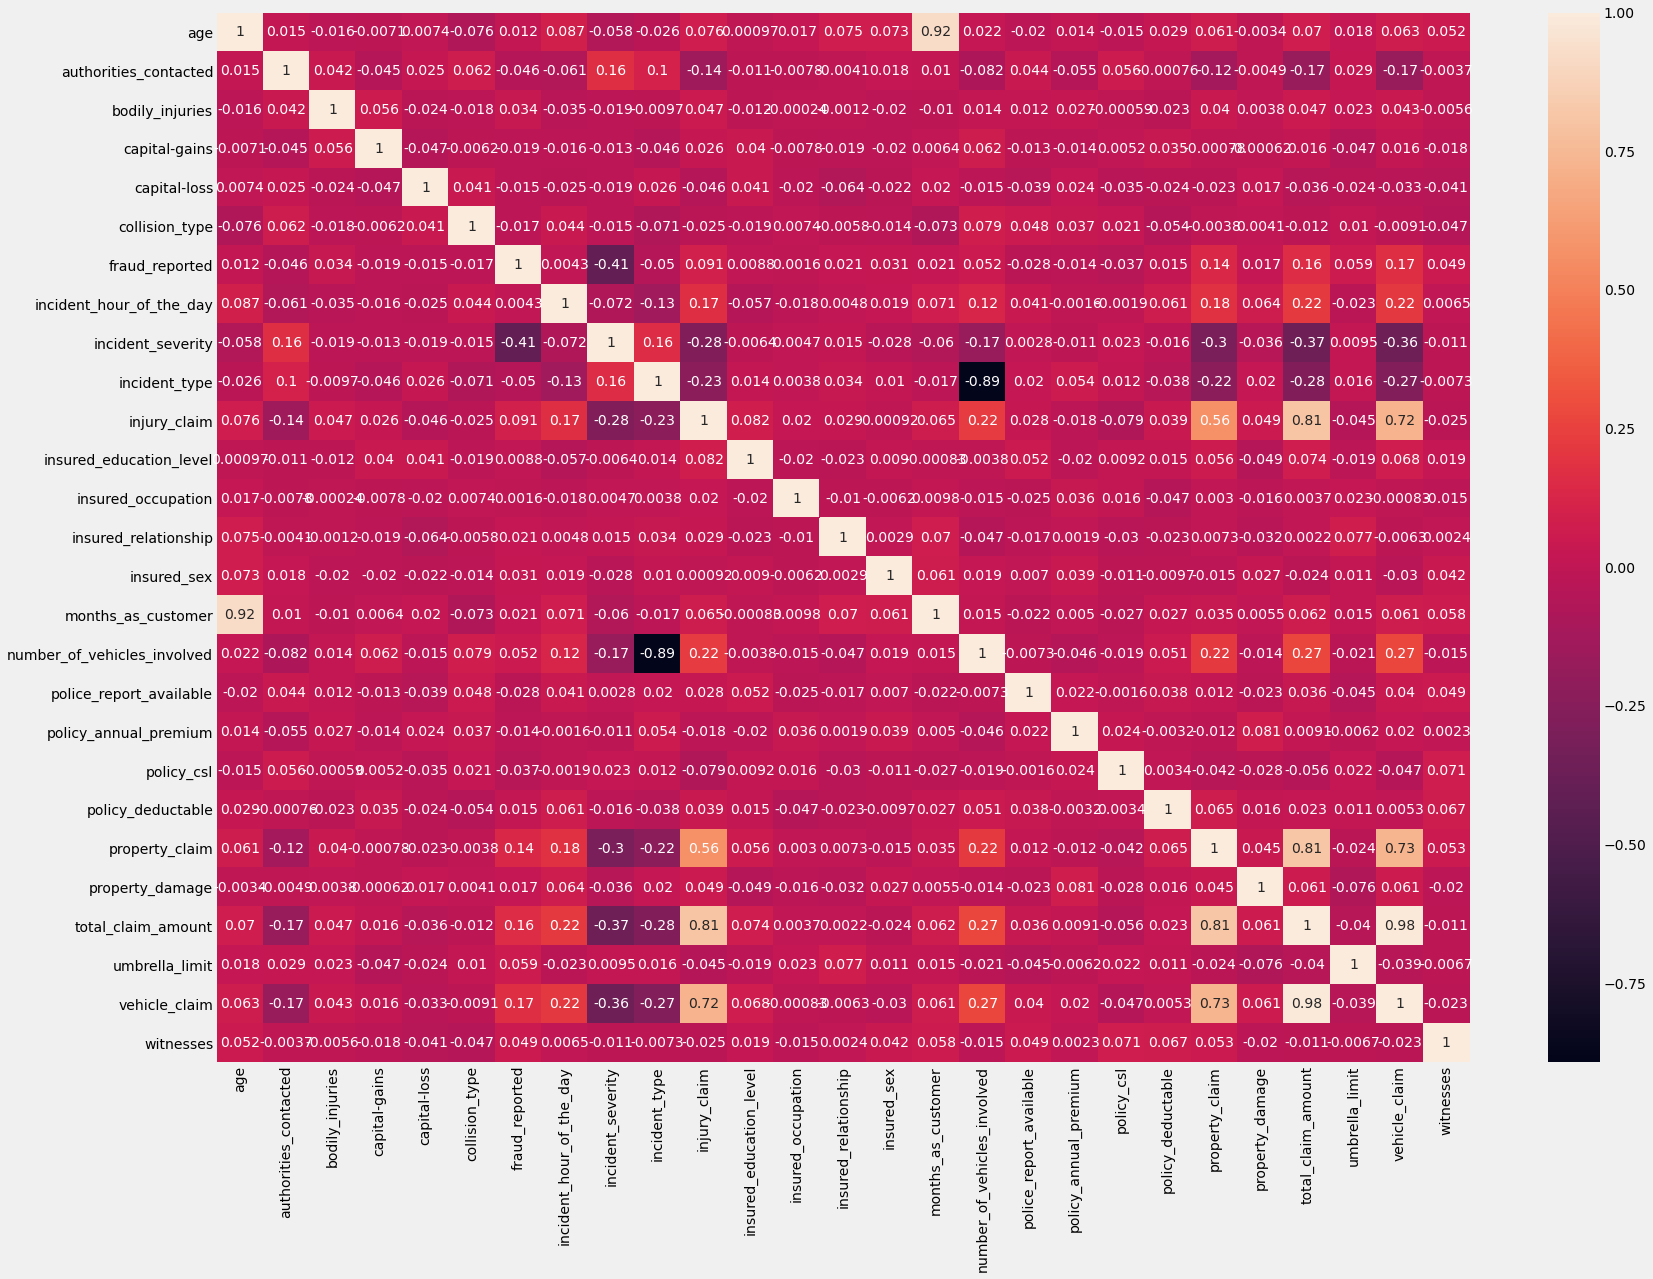

In [62]:
plt.figure(figsize=(25,18))
sns.heatmap(df_new.corr(),annot=True)

In [63]:
# From this heatmap we have got the correlation values and we can see that the column "incident_severity" has high negative
# correlation with the target column compared to all other columns
# So higher the severity, chances of fraud is less
# There are many columns which are weakly correlated with the target


#### let's check for outliers.



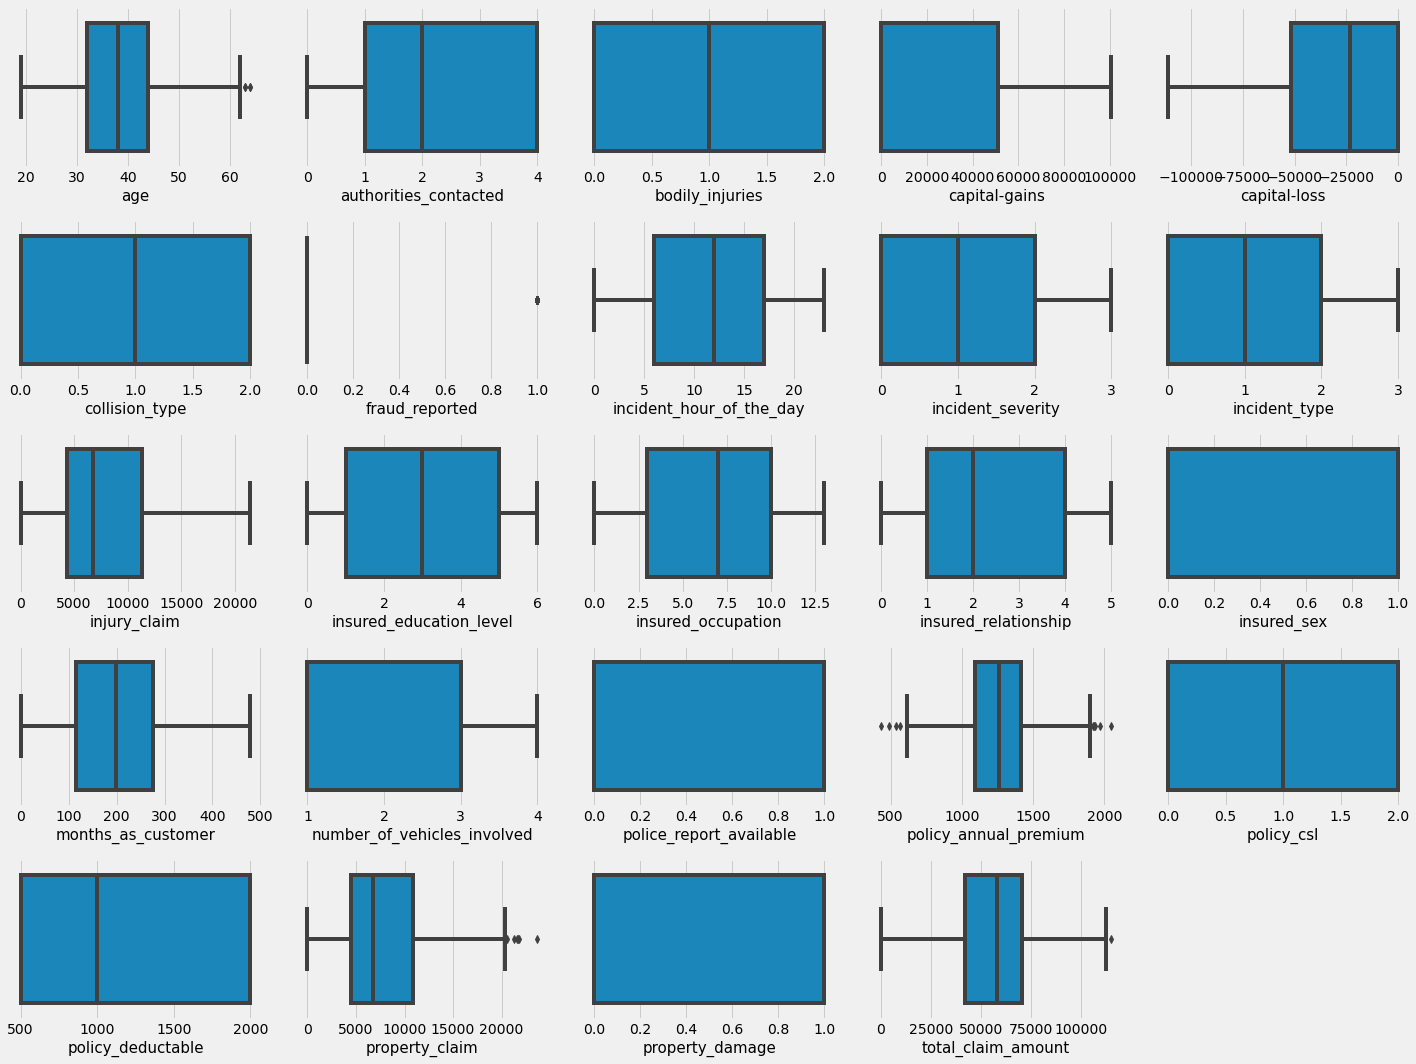

In [64]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in df_new.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(df_new[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

We find the presence of outliers in few columns, lets check for skewness

In [65]:
df_new.skew()

age                            0.478988
authorities_contacted         -0.121744
bodily_injuries                0.014777
capital-gains                  0.478850
capital-loss                  -0.391472
collision_type                -0.033682
fraud_reported                 1.175051
incident_hour_of_the_day      -0.035584
incident_severity              0.279016
incident_type                  0.101507
injury_claim                   0.264811
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
insured_sex                    0.148630
months_as_customer             0.362177
number_of_vehicles_involved    0.502664
police_report_available        0.802728
policy_annual_premium          0.004402
policy_csl                     0.088928
policy_deductable              0.477887
property_claim                 0.378169
property_damage                0.863806
total_claim_amount            -0.594582
umbrella_limit                 1.806712


We have minimal skewness in our dataset, let's remove the few outliers present and hence thereby the skewness will be handled

In [66]:
from scipy import stats
from scipy.stats import zscore

df_new1 = df_new[(np.abs(stats.zscore(df_new)) < 3).all(axis=1)] # remove outliers
# df_new1 = df_new.apply(zscore) # Normalization

In [80]:
# info of data after removing outliers

df_new1.shape

(980, 27)

In [ ]:
# Calculating the percentage of data loss

In [81]:
Data_loss=((1000-980)/1000)*100

In [82]:
Data_loss

2.0

In [ ]:
# So here we can see that we have lost nearly 2 % of data after removing the outliers and is acceptable


 Outliers are handled and hence the skewness

In [67]:
df_new1.skew()

age                            0.475385
authorities_contacted         -0.114044
bodily_injuries                0.003757
capital-gains                  0.466619
capital-loss                  -0.376884
collision_type                -0.032778
fraud_reported                 1.188267
incident_hour_of_the_day      -0.039280
incident_severity              0.277726
incident_type                  0.090563
injury_claim                   0.271759
insured_education_level        0.006286
insured_occupation            -0.055360
insured_relationship           0.078339
insured_sex                    0.139324
months_as_customer             0.362608
number_of_vehicles_involved    0.509725
police_report_available        0.796221
policy_annual_premium          0.035964
policy_csl                     0.098248
policy_deductable              0.476090
property_claim                 0.361356
property_damage                0.853093
total_claim_amount            -0.593593
umbrella_limit                 1.801424


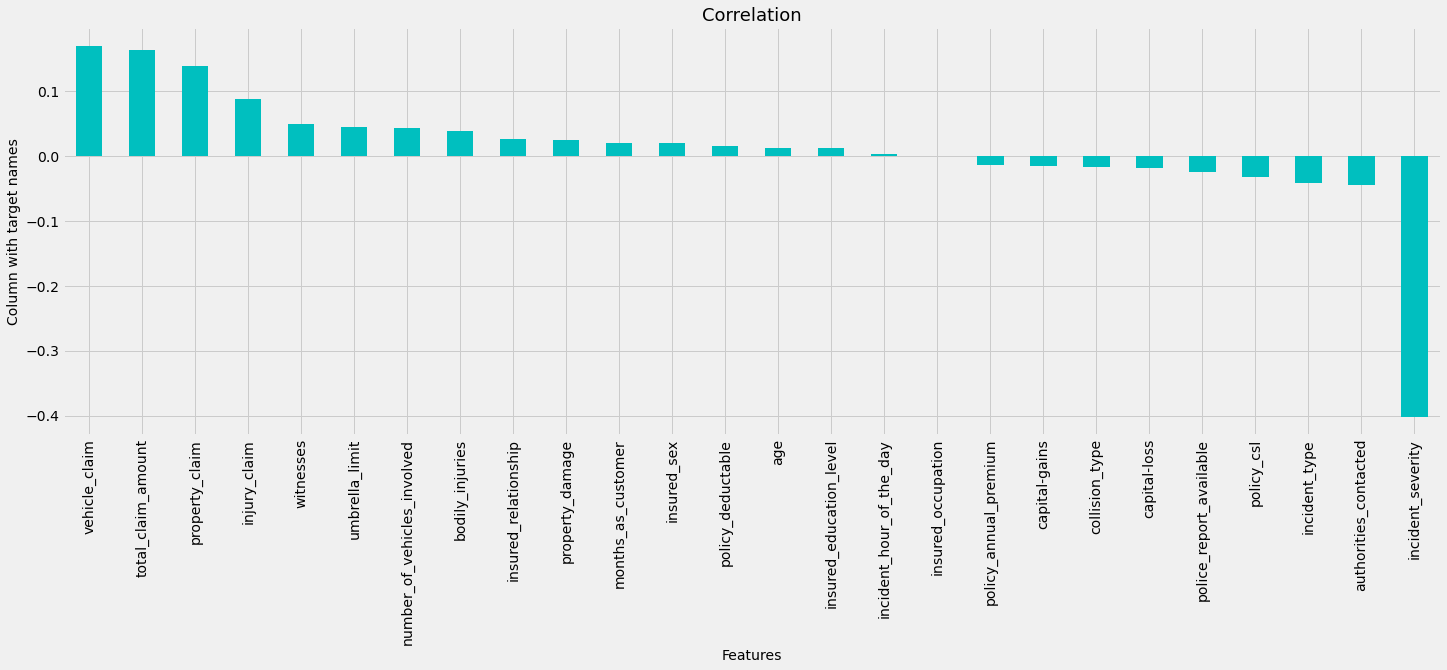

In [68]:
plt.figure(figsize=(22,7))
df_new1.corr()['fraud_reported'].sort_values(ascending=False).drop(["fraud_reported"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


This gives a more clearer picture comapred to heatmap onto which features are positively and which features are negatively correlated.

Incident_severity had high negative correlation with the target column and hence is an important factor in detecting the insurance fraud

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

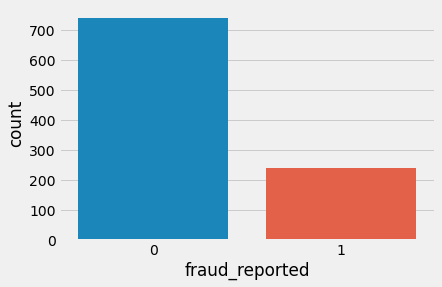

In [69]:
sns.countplot(df_new1['fraud_reported'])

In [70]:
df_new1['fraud_reported'].value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

In [71]:
# Here we can clearly see that the classes 0 and 1 are not balanced
# Lets try to balance them first

In [72]:
# We need to split the data into X and y before we could try balancing the classes
# Splitting the dataset into X features and y label

X = df_new1.drop(['fraud_reported'],axis=1)
y = df_new1['fraud_reported']

In [73]:
X.head()

,age,authorities_contacted,bodily_injuries,capital-gains,capital-loss,collision_type,incident_hour_of_the_day,incident_severity,incident_type,injury_claim,...,police_report_available,policy_annual_premium,policy_csl,policy_deductable,property_claim,property_damage,total_claim_amount,umbrella_limit,vehicle_claim,witnesses
0,48.0,4,1.0,53300.0,0.0,2,5.0,0,2,6510.0,...,1,1406.91,1,1000.0,13020.0,1,71610.0,0.0,52080.0,2.0
1,42.0,4,0.0,0.0,0.0,1,8.0,1,3,780.0,...,0,1197.22,1,2000.0,780.0,0,5070.0,5000000.0,3510.0,0.0
2,29.0,4,2.0,35100.0,0.0,1,7.0,1,0,7700.0,...,0,1413.14,0,2000.0,3850.0,0,34650.0,5000000.0,23100.0,3.0
3,41.0,4,1.0,48900.0,-62400.0,0,5.0,0,2,6340.0,...,0,1415.74,1,2000.0,6340.0,0,63400.0,6000000.0,50720.0,2.0
4,44.0,2,0.0,66000.0,-46000.0,1,20.0,1,3,1300.0,...,0,1583.91,2,1000.0,650.0,0,6500.0,6000000.0,4550.0,1.0


In [74]:
# Target column is successfully dropped in X

In [75]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [76]:
# Applying over-sampling to balance our classes

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

In [83]:
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

In [84]:
# Now that we see that our classes are balanced
# Class 0 has 740 values
# Class 1 has 740 values

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.02818429 0.03473299 0.03764309 0.02679338 0.02751254 0.03316884
 0.03235137 0.22006741 0.02968003 0.03258022 0.02929855 0.0377831
 0.0292275  0.02116857 0.02919002 0.02612524 0.03011326 0.02832118
 0.04273101 0.03128609 0.03490103 0.0202428  0.03708789 0.01992835
 0.04194318 0.03793809]


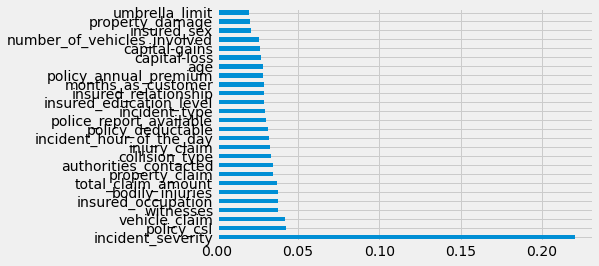

In [87]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()

In [88]:
# This proves the very important feature is "Incident severity"

In [89]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [90]:
# Scaling the  values in the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_xtrain=scaler.fit_transform(X_train)
scaled_xtest=scaler.transform(X_test)

In [106]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

### Support Vector Classifier

In [92]:
svc = SVC()
svc.fit(scaled_xtrain, y_train)
y_pred = svc.predict(scaled_xtest)

# accuracy_score, confusion_matrix and classification_report
svc_train_acc = accuracy_score(y_train, svc.predict(scaled_xtrain))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.927027027027027
Test accuracy of Support Vector Classifier is : 0.8297297297297297
[[147  37]
 [ 26 160]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       184
           1       0.81      0.86      0.84       186

    accuracy                           0.83       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.83      0.83      0.83       370



I have used classification report because it gives all the values of accuracy,precision, recall and f1-score

Since the classes are balanced we can just take accuracy into consideration

We are getting 83% Accuracy using SupportVectorClassifier

In [107]:
print(cross_val_score(svc,X,y,cv=5).mean())

0.5047297297297297


### KNN

In [93]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(scaled_xtrain, y_train)
y_pred = knn.predict(scaled_xtest)

# accuracy_score, confusion_matrix and classification_report
knn_train_acc = accuracy_score(y_train, knn.predict(scaled_xtrain))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7108108108108108
Test accuracy of KNN is : 0.7
[[ 83 101]
 [ 10 176]]
              precision    recall  f1-score   support

           0       0.89      0.45      0.60       184
           1       0.64      0.95      0.76       186

    accuracy                           0.70       370
   macro avg       0.76      0.70      0.68       370
weighted avg       0.76      0.70      0.68       370



In [ ]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# We are getting 70% Accuracy using KNeighborsClassifier

In [108]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.5621621621621621


# Decision Tree Classifier

In [94]:
dtc = DecisionTreeClassifier()
dtc.fit(scaled_xtrain, y_train)
y_pred = dtc.predict(scaled_xtest)

dtc_train_acc = accuracy_score(y_train, dtc.predict(scaled_xtrain))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.7864864864864864
[[136  48]
 [ 31 155]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       184
           1       0.76      0.83      0.80       186

    accuracy                           0.79       370
   macro avg       0.79      0.79      0.79       370
weighted avg       0.79      0.79      0.79       370



In [ ]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# We are getting 79% Accuracy using DecisionTreeClassifier

In [109]:
print(cross_val_score(dtc,X,y,cv=5).mean())

0.7777027027027028


# Hyper-parameter tuning

In [95]:


from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(scaled_xtrain, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [96]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)



{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.7918918918918919


In [97]:
# best estimator 
dtc = grid_search.best_estimator_
y_pred = dtc.predict(scaled_xtest)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(scaled_xtrain))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.7990990990990992
Test accuracy of Decision Tree is : 0.8
[[154  30]
 [ 44 142]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       184
           1       0.83      0.76      0.79       186

    accuracy                           0.80       370
   macro avg       0.80      0.80      0.80       370
weighted avg       0.80      0.80      0.80       370



After hyper-parameter tuning

Training accuracy of Decision Tree is 79.9%

Test accuracy of Decision Tree is 80%

Confusion matrix is also plotted

### Random forest classifier

In [98]:
rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(scaled_xtrain, y_train)

y_pred = rand_clf.predict(scaled_xtest)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(scaled_xtrain))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9945945945945946
Test accuracy of Random Forest is : 0.8594594594594595
[[156  28]
 [ 24 162]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       184
           1       0.85      0.87      0.86       186

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370



In [ ]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# We are getting 86% Accuracy using RandomForestClassifier

In [110]:
print(cross_val_score(rand_clf,X,y,cv=5).mean())

0.85


In [99]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid=GridSearchCV(RandomForestClassifier(),paramgrid)
grid.fit(scaled_xtrain, y_train)

# best parameters and best score

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 13, 'n_estimators': 161}
0.8675675675675676


In [100]:
# best estimator 
rfc = grid.best_estimator_
y_pred = rfc.predict(scaled_xtest)

rfc_train_acc = accuracy_score(y_train, rfc.predict(scaled_xtrain))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random forest is : {rfc_train_acc}")
print(f"Test accuracy of Random forest  is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random forest is : 1.0
Test accuracy of Random forest  is : 0.8675675675675676
[[156  28]
 [ 21 165]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       184
           1       0.85      0.89      0.87       186

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370



The performance is increased to 87% after hyper-parameter tuning

### XgBoost Classifier

In [101]:
xgb = XGBClassifier()
xgb.fit(scaled_xtrain, y_train)
y_pred = xgb.predict(scaled_xtest)

xgb_train_acc = accuracy_score(y_train, xgb.predict(scaled_xtrain))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[08:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.8648648648648649
[[158  26]
 [ 24 162]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       184
           1       0.86      0.87      0.87       186

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370



In [ ]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# We are getting 86% Accuracy using XGBoostClassifier

In [111]:
print(cross_val_score(xgb,X,y,cv=5).mean())

0.7777027027027028


In [102]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(scaled_xtrain, y_train)

# best estimator 

xgb = grid_search.best_estimator_
y_pred = xgb.predict(scaled_xtest)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


In [103]:

xgb_train_acc = accuracy_score(y_train, xgb.predict(scaled_xtrain))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 0.7990990990990992
Test accuracy of XgBoost is : 0.8
[[154  30]
 [ 44 142]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       184
           1       0.83      0.76      0.79       186

    accuracy                           0.80       370
   macro avg       0.80      0.80      0.80       370
weighted avg       0.80      0.80      0.80       370



After hyper-parameter tuning

Training accuracy of XGBClassifier is 79.9%

Test accuracy of XGBClassifier is 80%

Confusion matrix is also plotted

In [104]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest',
             'XgBoost'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rfc_test_acc, xgb_test_acc]})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.867568
0,SVC,0.829730
2,Decision Tree,0.800000
4,XgBoost,0.800000
1,KNN,0.700000


We have found the cross validation score for all the models

Cross - Validation score for RandomForestClassifier is 0.85

Cross - Validation score for SupportVectorClassifier is 0.504

Cross - Validation score for DecisionTreeClassifier is 0.777

Cross - Validation score for XGBClassifier is 0.777

Cross - Validation score for KNN is 0.562

Now let's find the difference between the cross-validation score and the model performance

The one with least difference with cv is the best model

The difference between model performance and cross validation score for RandomForestClassifier is 0.017

The difference between model performance and cross validation score for SupportvectorClassifier is 0.325

The difference between model performance and cross validation score for DecisionTreeClassifier is 0.023

The difference between model performance and cross validation score for XGBClassifier is 0.023

The difference between model performance and cross validation score for KNN is 0.138

From the above we decide that 

# RandomForest Classifier is the best model in prediction of Insurance Claims - Fraud Detection 

# Saving the model

In [115]:
# Serializing or saving the model
# Importing the necessary library for saving the model
import joblib
joblib.dump(rfc,"FinalModel.pkl")

['FinalModel.pkl']

Model is saved